In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

In [7]:
dataset = pd.read_csv('../House_Prices.csv')
dataset.head(2)

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.0,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.0,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316


In [8]:
dataset.isnull().sum()

ID               0
Date             0
Price            0
Bedrooms         0
Bathrooms        0
Sqft_living      0
Sqft_lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Grade            0
Sqft_above       0
Sqft_basement    0
Yr_built         0
Yr_renovated     0
zipcode          0
Lat              0
Long             0
Sqft_living15    0
Sqft_lot15       0
dtype: int64

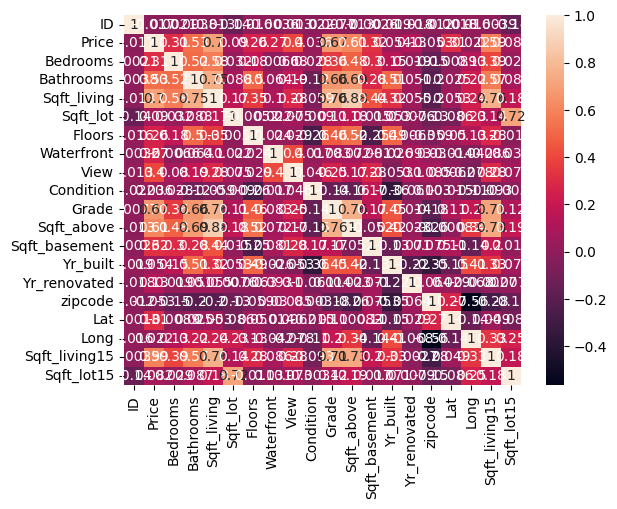

In [20]:
plt.Figure(figsize=(10, 10))
sns.heatmap(data=dataset.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

In [17]:
x = dataset.iloc[:, 3:]
y = dataset['Price']

In [23]:
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)
x

,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,2.826929,1.149449,0.348534,-0.138436,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.738595,-0.658681,0.680729,-0.210128,-1.419335,-1.687729,-0.000736,0.107164,-0.199698
1,2.826929,1.149449,0.348534,-0.138436,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.738595,-0.658681,0.680729,-0.210128,-1.419335,-1.687729,-0.000736,0.107164,-0.199698
2,0.676485,-0.473621,-0.021667,0.263862,-0.915427,-0.087173,-0.305759,0.907554,0.291916,-0.758860,1.374919,-0.817259,-0.210128,1.645868,-0.834672,-0.973574,0.880463,0.334116
3,-0.398737,-1.447464,-0.674963,0.673427,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.396573,-0.658681,-0.647033,-0.210128,1.645868,-0.841889,-0.945170,0.384384,0.265700
4,-0.398737,-1.447464,-0.707628,-0.181266,0.010539,-0.087173,-0.305759,0.907554,-1.409587,-0.940004,0.290333,-1.396027,-0.210128,1.683249,-0.590013,-0.362887,-1.016308,-0.089675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.751707,-0.149007,-0.522528,-0.264102,0.010539,-0.087173,-0.305759,-0.629187,-0.558836,-0.227505,-0.658681,-1.498163,-0.210128,0.898258,-0.219056,-1.186604,-1.162213,-0.314994
21609,-1.473959,-1.447464,-1.132271,-0.186747,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-1.145300,-0.206770,-1.089621,-0.210128,0.898258,-0.227717,-1.165301,-0.082513,-0.279028
21610,-0.398737,-1.447464,-1.066941,-0.265067,-0.915427,-0.087173,-0.305759,0.907554,-0.558836,-1.290215,0.199950,-0.987485,-0.210128,0.898258,-0.219778,-1.172402,-0.695316,-0.301443
21611,-1.473959,-0.473621,-0.729405,-0.340466,0.010539,-0.087173,-0.305759,-0.629187,1.142667,-1.072843,0.493693,1.361632,-0.210128,-0.952078,-0.111522,1.391062,-0.797450,-0.424137


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [37]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7035699347667921

In [ ]:
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(mean_squared_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

124377.77058559516
36653590647.62773
191451.27486550654


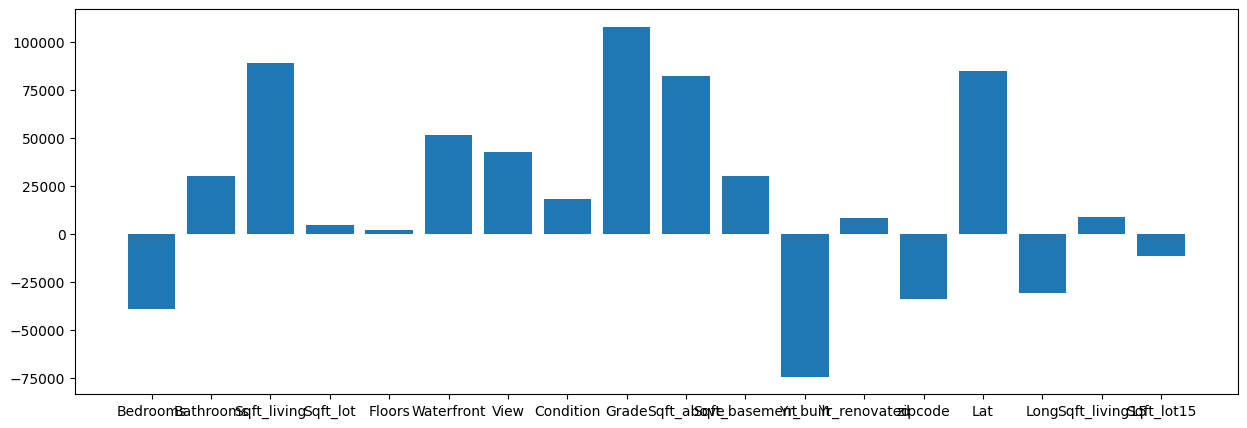

In [34]:
plt.figure(figsize=(15, 5))
plt.bar(x.columns, lr.coef_)
plt.show()

In [30]:
las = Lasso(alpha=0.5)
las.fit(x_train, y_train)
las.score(x_test, y_test)

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+13, tolerance: 2.248e+11
  model = cd_fast.enet_coordinate_descent(


0.7035695711457846

In [44]:
print(mean_absolute_error(y_test, las.predict(x_test)))
print(mean_squared_error(y_test, las.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, las.predict(x_test))))

124377.76448631112
36653635609.38136
191451.39228896028


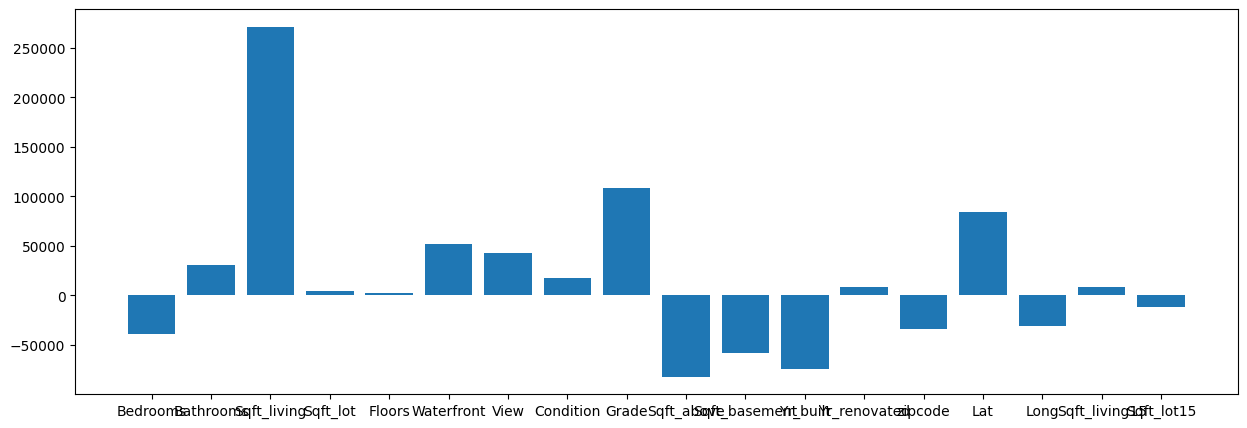

In [35]:
plt.figure(figsize=(15, 5))
plt.bar(x.columns, las.coef_)
plt.show()

In [31]:
ra = Ridge(alpha=10)
ra.fit(x_train, y_train)
ra.score(x_test, y_test)

0.7036103943813392

In [45]:
print(mean_absolute_error(y_test, ra.predict(x_test)))
print(mean_squared_error(y_test, ra.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ra.predict(x_test))))

124349.88184445575
36648587814.50348
191438.20886777926


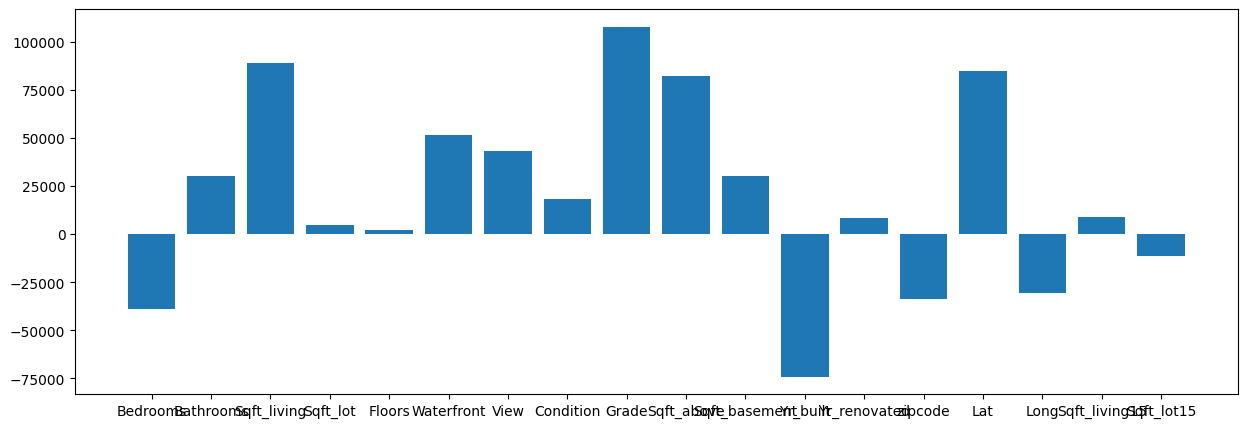

In [32]:
plt.figure(figsize=(15, 5))
plt.bar(x.columns, ra.coef_)
plt.show()